# ML: Supervised algorithm - SVM - Heart Abnormality for Defibrillator

## Introduction

Automated External Defibrillators (AEDs) are electronic devices commonly used to treat certain types of arrhythmias.

They are capable of analysing the heart rhythm and detect if the rhythm present is amenable to cardiac treatment or not by means of an electric shock.

These devices can be found commonly strategically placed in public so that they can be used by people witnessing a cardiac arrest and immediately initiate resuscitation of the affected person. 

For these devices to be truly effective, they must be used immediately. Therefore, it is of utmost importance that any person is able to use it without any prior knowledge. 

Therefore, these devices are equipped with a predictive classification algorithm that detects whether or not there is any cardiac anomaly.

## 1. Import of libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from mrmr import mrmr_classif
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn import svm

## 2. Load datasets

In [49]:
dfonu=pd.read_csv('data_onu.csv') #test dataset
dfreto=pd.read_csv('data_reto.csv') #train dataset

We will perform a data quality check, in case data wrangling & cleaning is necessary beforehand.

In [3]:
pd.set_option('display.max_columns', None)
dfonu.head(5)

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,438.42,46.800,120,120,0.099658,0.16016,1.75,800,0.153170,0.58320,1.8463,0.013544,0.35512,1.03340,0.59693,0.092500,0.096250,0.16650,0.009658,9,1.8930,0.53153,0.003338,0.354,0.29044,1.6479,12.889,23.50,78.75,10.9500,0
1,449.10,46.467,60,120,0.119590,0.15713,1.75,805,-0.053068,0.60206,1.8556,0.010722,0.33294,1.07070,0.62901,0.090625,0.103120,0.17408,0.012657,12,1.8930,0.56449,0.002208,0.224,0.47144,1.7700,10.418,21.25,83.75,10.7210,0
2,466.82,49.533,90,135,0.099658,0.16490,1.75,792,-0.159920,0.58141,1.8511,0.007922,0.40213,1.11960,0.64374,0.092500,0.097500,0.16576,0.015831,12,1.8930,0.33149,0.002520,0.270,0.57652,2.0752,18.861,18.25,83.25,9.5106,0
3,549.38,52.600,120,120,0.089692,0.17177,1.75,780,-0.399490,0.59277,1.7017,0.000000,0.51941,0.81257,0.71385,0.073125,0.089375,0.12743,0.011373,15,1.8930,0.25013,0.001687,0.264,0.56407,1.9531,14.784,22.00,86.75,11.7990,0
4,426.55,56.533,135,105,0.119590,0.18101,2.25,763,-0.430150,0.51779,1.6104,0.014365,0.39363,0.71657,0.68439,0.088125,0.100000,0.19576,0.011764,16,2.0151,0.49224,0.001386,0.242,0.45114,1.4648,12.842,28.75,78.75,13.5370,0


In [4]:
dfonu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     200 non-null    float64
 1   TCSC    200 non-null    float64
 2   exp     200 non-null    int64  
 3   expmod  200 non-null    int64  
 4   cm      200 non-null    float64
 5   cvbin   200 non-null    float64
 6   frqbin  200 non-null    float64
 7   abin    200 non-null    int64  
 8   kurt    200 non-null    float64
 9   vfleak  200 non-null    float64
 10  M       200 non-null    float64
 11  A1      200 non-null    float64
 12  A2      200 non-null    float64
 13  A3      200 non-null    float64
 14  mav     200 non-null    float64
 15  psr     200 non-null    float64
 16  hilb    200 non-null    float64
 17  SamEn   200 non-null    float64
 18  x3      200 non-null    float64
 19  x4      200 non-null    int64  
 20  x5      200 non-null    float64
 21  x1      200 non-null    float64
 22  x2

In [5]:
dfonu.duplicated().sum()

0

In [6]:
pd.set_option('display.max_columns', None)
dfreto.head(5)

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,360.08,42.933,60,135,0.109620,0.15281,1.75,812,0.23413,0.65476,2.0421,0.014453,0.30493,1.36910,0.55733,0.089375,0.093750,0.17286,0.014595,12,1.8930,0.52618,0.003299,0.258,0.48395,2.1362,49.342,19.25,73.75,8.0208,0
1,333.41,54.733,120,150,0.149490,0.19259,2.25,740,-0.64581,0.45448,1.3178,0.039420,0.48202,0.51023,0.71640,0.097500,0.110000,0.21055,0.016797,14,2.6258,0.61896,0.002891,0.220,0.32814,1.5259,28.785,45.00,89.25,25.8700,0
2,359.18,46.600,90,180,0.169420,0.23900,3.00,606,0.26447,0.61511,2.0970,0.008673,0.31914,1.39090,0.59793,0.095625,0.106870,0.17792,0.014741,9,1.8930,0.56023,0.005732,0.302,0.34270,1.8921,32.381,28.50,78.25,13.4750,0
3,416.67,41.867,0,135,0.119590,0.15029,1.75,816,0.65061,0.65536,1.7065,0.016068,0.39236,0.83470,0.54609,0.083750,0.081875,0.15856,0.007259,9,2.0151,0.50644,0.003233,0.288,0.47740,1.8311,16.677,28.50,77.50,13.6130,0
4,544.08,49.333,120,120,0.099658,0.16490,2.00,792,-0.14313,0.61120,1.9452,0.000729,0.42743,1.15410,0.64798,0.090000,0.096875,0.15663,0.009556,10,1.8930,0.28983,0.003547,0.266,0.48095,2.0142,12.484,24.75,74.75,10.5270,0


In [7]:
dfreto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     9146 non-null   float64
 1   TCSC    9146 non-null   float64
 2   exp     9146 non-null   int64  
 3   expmod  9146 non-null   int64  
 4   cm      9146 non-null   float64
 5   cvbin   9146 non-null   float64
 6   frqbin  9146 non-null   float64
 7   abin    9146 non-null   int64  
 8   kurt    9146 non-null   float64
 9   vfleak  9146 non-null   float64
 10  M       9146 non-null   float64
 11  A1      9146 non-null   float64
 12  A2      9146 non-null   float64
 13  A3      9146 non-null   float64
 14  mav     9146 non-null   float64
 15  psr     9146 non-null   float64
 16  hilb    9146 non-null   float64
 17  SamEn   9146 non-null   float64
 18  x3      9146 non-null   float64
 19  x4      9146 non-null   int64  
 20  x5      9146 non-null   float64
 21  x1      9146 non-null   float64
 22  

In [8]:
dfreto.duplicated().sum()

0

We see that all variables are numerical and it is correctly parameterised and cleaned.

The dataset consists of a set of 30 parameters calculated from the Electrocardiogram (ECG). These parameters collect different characteristics of the ECG, from its temporal behaviour, such as amplitude, slope, etc. To more complex characteristics such as spectral variables. The complete list of parameters is shown below:

__Temporal parameters__ 

* TCI = threshold crossing interval 

* TCSC = threshold crossing sample count 

* Exp = standard exponential

* Expmod = modified exponential

* MAV = mean absolute value

* count1 

* count2 

* count3

* x1

* x2

* bCP

__Spectral parameters__ 

* vFleak = VF filter

* M

* A1

* A2

* A3

* x3

* x4

* x5

* bWT

__Time-frequency type parameters__

* Li = based on ECG waveform analysis.

__ECG complexity parameters__  

* CM = complexity measure

* CVbin = covariance

* abin = area

* Frqbin = frequency

* Kurt = kurtosis of a binary signal extracted from the ECG

* PSR = phase space reconstruction

* HILB = the Hilbert transform

* SamEn = sample entropy

__Output variable__

The variable we will use to classify the data will be **VF**. Where:
- 0 indicates that the person is healthy.
- 1 indicates that the person has Ventricular Fibrillation (VF). 



We perform a distribution of values check on the output variable.

In [9]:
dfreto.VF.value_counts()

0    7590
1    1556
Name: VF, dtype: int64

In [10]:
dfreto.VF.value_counts(normalize=True)

0    0.829871
1    0.170129
Name: VF, dtype: float64

In [11]:
dfonu.VF.value_counts()

0    170
1     30
Name: VF, dtype: int64

In [12]:
dfonu.VF.value_counts(normalize=True)

0    0.85
1    0.15
Name: VF, dtype: float64



## 3. Dataset analysis
To understand the distribution of the data, let's take a look:

- The amount of data (count)
- The distribution of the data by quartiles (25%,50%,75%)
- Mean of the data (mean)
- Minimum and maximum (min, max)
- Standard deviation (std)
- ...

In [13]:
dfonu.describe()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,505.89700,25.788999,82.350000,144.975000,0.150184,0.180227,2.693750,732.740000,6.130033,0.726590,2.860691,0.020407,0.268852,1.790293,0.371209,0.066609,0.074682,0.177294,0.011575,7.810000,2.883492,0.505805,0.065212,0.592410,0.225257,5.229491,26.088021,23.473750,74.327500,10.525591,0.150000
std,269.82831,19.139260,72.117837,66.306918,0.057327,0.064030,1.348142,125.955174,5.467611,0.153040,1.491986,0.018413,0.149338,0.953834,0.186225,0.020466,0.022602,0.113777,0.023535,5.923626,1.592653,0.196176,0.061436,0.254617,0.188895,2.274479,19.097903,8.043631,13.241841,6.979614,0.357967
min,160.19000,3.733300,0.000000,30.000000,0.049829,0.020580,0.500000,502.000000,-1.311600,0.217630,0.860480,0.000000,0.072710,0.029231,0.142840,0.028750,0.033125,0.025926,0.000055,2.000000,1.038100,0.161250,0.000720,0.056000,0.021103,0.305180,1.391100,10.250000,46.750000,2.170700,0.000000
25%,316.82500,10.183250,30.000000,90.000000,0.099658,0.155747,1.500000,633.000000,1.133875,0.689300,1.708750,0.007822,0.160697,1.017132,0.238017,0.049375,0.054375,0.098832,0.000613,4.000000,1.770900,0.356935,0.015888,0.381000,0.093527,3.723100,9.407950,17.500000,64.250000,5.659175,0.000000
50%,426.11500,17.567000,60.000000,135.000000,0.139520,0.198440,2.500000,727.500000,5.923950,0.778945,2.452450,0.015759,0.230115,1.896900,0.295905,0.064375,0.073125,0.135500,0.002145,5.000000,2.259400,0.475595,0.051626,0.674000,0.167475,5.401600,22.904000,21.625000,72.375000,8.548750,0.000000
75%,629.40500,40.117000,120.000000,195.000000,0.189350,0.232540,3.750000,807.250000,9.775900,0.835285,3.776050,0.028614,0.332873,2.527475,0.459885,0.086406,0.092500,0.226025,0.006997,8.000000,3.480700,0.616090,0.089952,0.801000,0.290560,6.897000,38.231250,28.062500,82.312500,12.891500,0.000000
max,1369.00000,75.867000,390.000000,315.000000,0.289010,0.250250,6.500000,979.000000,26.527000,0.903630,7.472400,0.099836,0.819100,3.447100,1.016000,0.101250,0.116880,0.497060,0.169390,26.000000,8.976600,0.982440,0.292480,0.936000,1.072500,9.216300,79.376000,55.750000,110.500000,41.122000,1.000000


In [14]:
dfreto.describe()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
count,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,504.320221,26.311054,86.337743,145.712880,0.153696,0.182451,2.793489,727.499344,6.194699,0.709490,2.749058,0.019585,0.287437,1.724214,0.380546,0.066870,0.074796,0.175772,0.013203,8.360595,2.944714,0.524501,0.064652,0.581557,0.234248,5.008640,25.916175,24.271731,74.598759,11.240366,0.170129
std,262.511975,20.286627,74.512381,66.011499,0.055616,0.063978,1.310632,126.400750,5.669886,0.167951,1.450825,0.017451,0.168817,0.962400,0.205014,0.020481,0.022989,0.110073,0.027817,6.357190,1.531353,0.195080,0.066675,0.261768,0.183484,2.433811,19.471469,9.173761,14.051281,8.418466,0.375767
min,121.520000,2.266700,0.000000,15.000000,0.029897,0.015760,0.000000,500.000000,-1.618400,0.114860,0.689660,0.000000,0.046368,0.000000,0.115220,0.023750,0.023750,0.030731,0.000025,0.000000,1.038100,0.103090,0.000227,0.030000,0.013999,0.244140,1.004900,9.500000,39.500000,1.999400,0.000000
25%,297.872500,10.533000,30.000000,90.000000,0.109620,0.152180,1.750000,624.000000,0.690283,0.662507,1.679925,0.006767,0.164302,0.932098,0.241390,0.051250,0.056875,0.099629,0.000597,4.000000,1.770900,0.388305,0.010427,0.346000,0.096473,3.356900,9.047500,17.750000,64.000000,5.608250,0.000000
50%,436.110000,17.333000,75.000000,135.000000,0.149490,0.202680,2.500000,718.000000,6.123800,0.771580,2.324500,0.015374,0.237275,1.804650,0.289915,0.063125,0.071250,0.134770,0.001962,6.000000,2.503700,0.499795,0.047565,0.662000,0.177870,5.188000,22.549000,22.750000,72.500000,8.789250,0.000000
75%,631.140000,42.450250,120.000000,195.000000,0.189350,0.234860,3.750000,813.000000,9.218200,0.824950,3.575000,0.028520,0.357962,2.539975,0.503550,0.085625,0.094375,0.212240,0.009122,10.000000,3.602800,0.621315,0.088832,0.796000,0.327258,6.713900,38.808500,27.750000,83.500000,13.360000,0.000000
max,1861.200000,83.867000,450.000000,375.000000,0.358770,0.250250,8.750000,984.000000,57.369000,0.917030,9.151600,0.131940,1.000100,3.550300,1.220900,0.106250,0.120000,0.563790,0.316800,30.000000,9.831500,0.993650,0.323140,0.948000,1.084600,11.536000,103.180000,83.000000,123.750000,78.707000,1.000000


### 3.1 Descriptive analysis

Visually represent the data in such a way that:
- Each dot symbolises a person.
- A dot is yellow if the person has Ventricular Fibrillation, and blue if they do not.
- The x and y axes represent two variables that we want to compare.

We will work with __dfreto__, the dataset we will use for training.

To make the visualisation interesting, we will select 2 variables through the algorithm: Minimum Redundancy Maximal Relevance. This will allow us to select the variables with the highest predictive power with the lowest redundancy (collinearity) as the name of the algorithm makes clear.  
Before selecting the variables, we standardise the dataset to avoid incorrect weighting of the variables during the selection process.

In [50]:
scl = StandardScaler()
dfreto_scl = scl.fit_transform(dfreto)
dfreto_scl = pd.DataFrame(dfreto_scl, columns=dfreto.columns)

In [16]:
X=dfreto_scl.iloc[:,:-1].copy()
y=dfreto_scl.iloc[:,-1].copy()

In [17]:
selected_features = mrmr_classif(X, y, K=2)

100%|██████████| 2/2 [00:00<00:00, 18.66it/s]


In [18]:
selected_features

['x4', 'vfleak']

In [19]:
X_toplot=dfreto.loc[:,selected_features]
X_toplot.head()

,x4,vfleak
0,12,0.65476
1,14,0.45448
2,9,0.61511
3,9,0.65536
4,10,0.61120


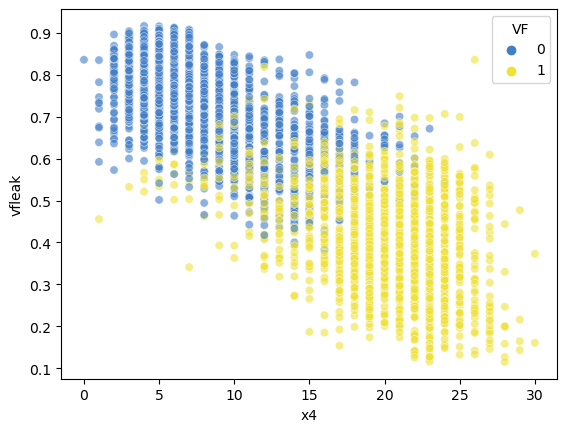

In [20]:
sns.scatterplot(data=dfreto,x=selected_features[0],y=selected_features[1], hue='VF', palette=['#417EC8','#EFE135'], alpha=0.6)
plt.show()

There is an overlap between the two categories, but even so, the transition between the two categories is clearly distinguishable.

Then, through a heatmap visualisation, we check the correlation between variables.

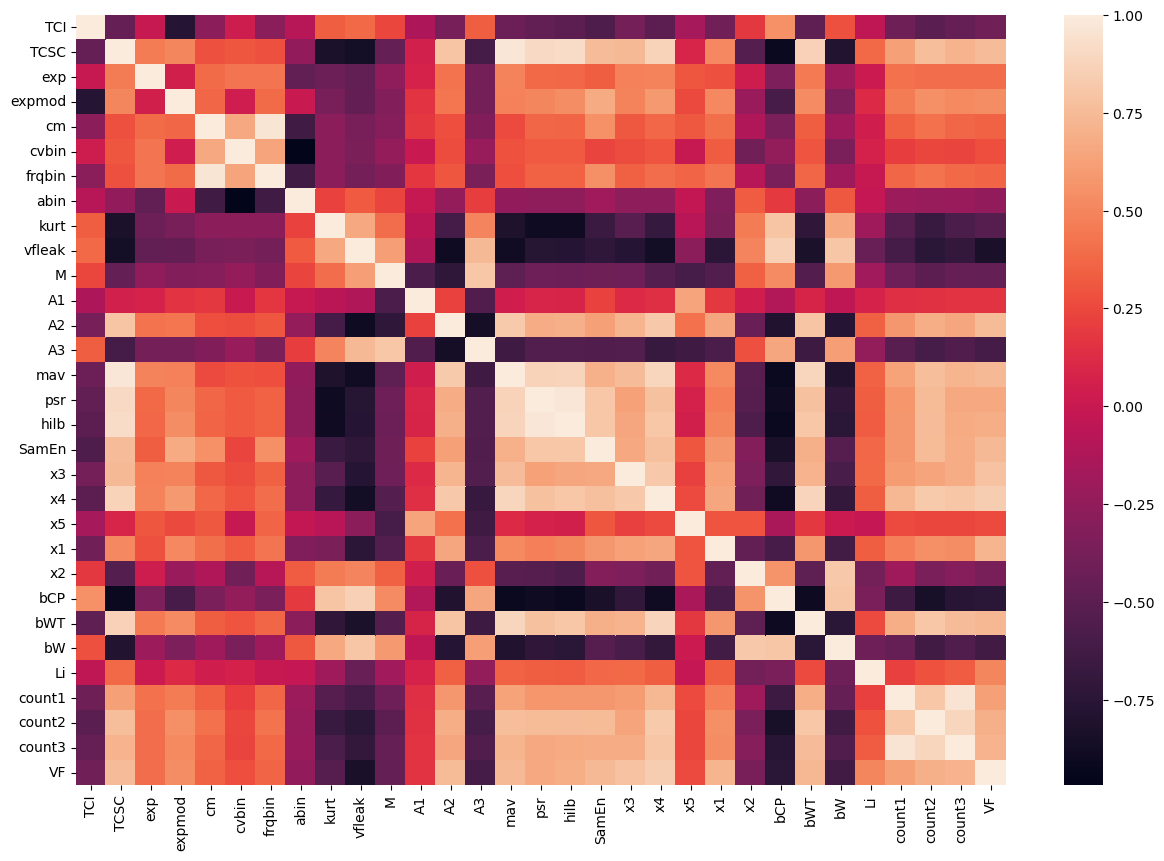

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(dfreto.corr())
plt.show()

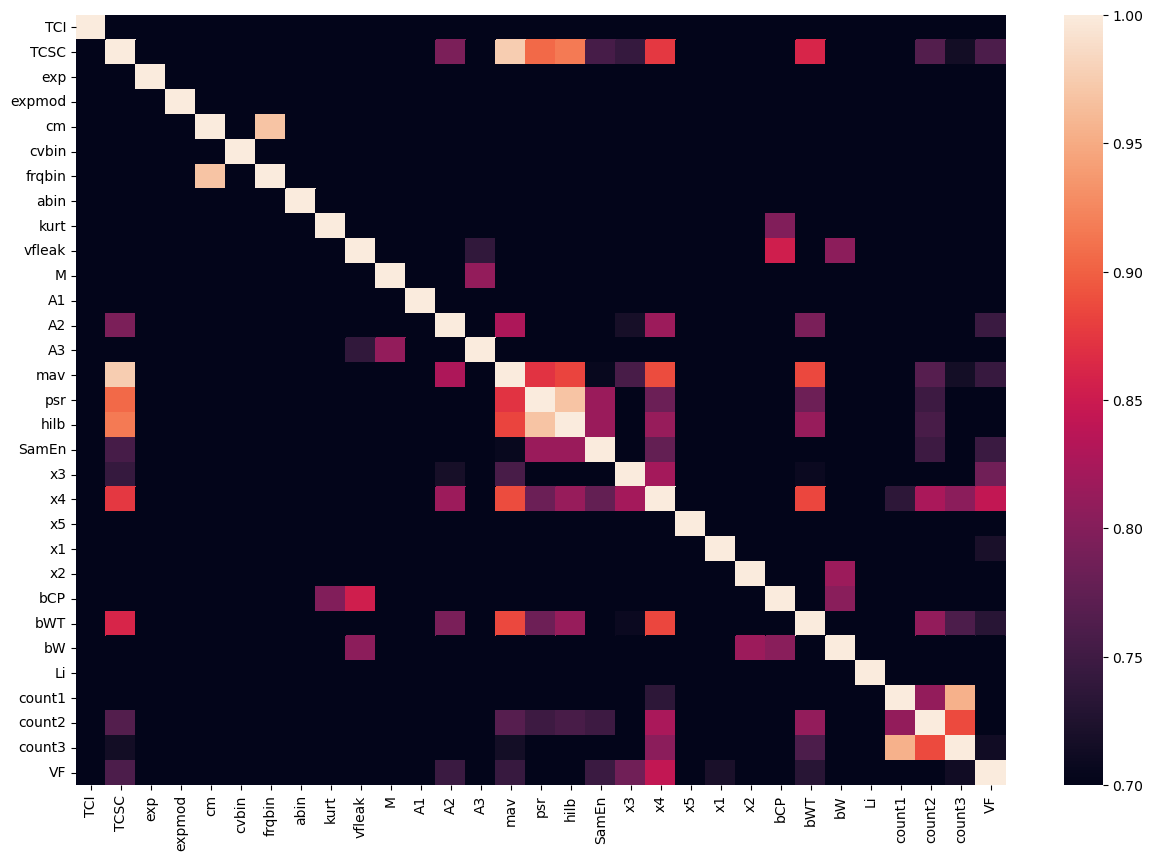

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(dfreto.corr(), vmin=0.7, vmax=1)
plt.show()

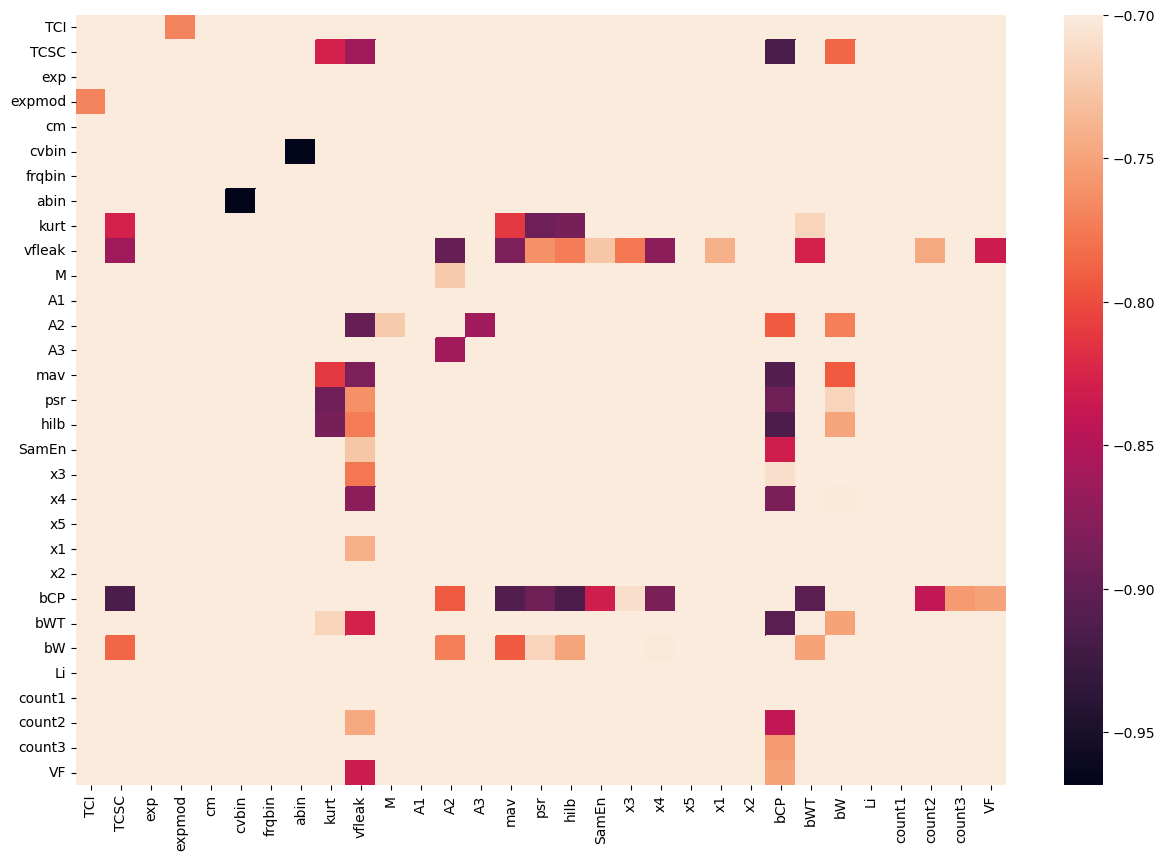

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(dfreto.corr(), vmax=-0.7)
plt.show()

In [24]:
ctotal=(dfreto.corr().count().sum()-31)/2
ctotal

465.0

In [25]:
correlation=dfreto.corr()
cpos=(correlation[correlation>0.7].count().sum()-31)/2
cpos

62.0

In [26]:
correlation=dfreto.corr()
cneg=(correlation[correlation<-0.7].count().sum()-31)/2
cneg

25.5

In [27]:
round((cneg+cpos)/ctotal,3)

0.188

18.8% of the correlations between variables are positively or negatively strong (>0.7, <-0.7). These are possible variables to eliminate in order to avoid overfitting, performance problems and miscalculations in the execution of the calculation of the pseudo-inverse matrices. It seems a good idea to apply a regularisation method.

## 4. Models training

In [28]:
seed=751986
X_train=dfreto.iloc[:,:-1].copy()
y_train=dfreto.iloc[:,-1].copy()

X_test=dfonu.iloc[:,:-1].copy()
y_test=dfonu.iloc[:,-1].copy()

Since we are going to use an algorithm sensitive to the distance between points (SVM: Support Vector Machine), which tries to maximise the distance between the support vectors, it is necessary to apply a standardisation on the data, so that they can be evaluated in the same scale/magnitude range.

In [29]:
sc = StandardScaler()
X_trainscaled = sc.fit_transform(X_train)
X_testscaled = sc.transform(X_test)

We are going to use the SVC model, which allows us to control the type of Kernel used, but at the same time it does not consider the "nu" parameter on the number of support vectors (NuSVC), a parameter that could be interesting to test in order to improve the model in the next steps.
It is important to note that this model does not scale well for datasets with >10K records. In our case X train has a lower number, so we proceed with the training.

Within the model parameters, we will configure an initial kernel of type "linear". Simple and also seems to fit the 2D plot well, after performing a feature selection method.

In [30]:
svm_linear = svm.SVC(kernel = 'linear', random_state = seed)

y_trainf=y_train.to_numpy(copy=True).flatten()

svm_linear.fit(X_trainscaled, y_trainf)


SVC(kernel='linear', random_state=751986)

Prediction according to test dataset

In [31]:
y_pred = svm_linear.predict(X_testscaled)

print("Model prediction:", accuracy_score(y_test, y_pred, normalize=True))

Precisión del modelo: 0.985


Prediction according to training dataset

In [32]:
y_pred_2 = svm_linear.predict(X_trainscaled)

print("Model prediction:", accuracy_score(y_train, y_pred_2, normalize=True))

Precisión del modelo: 0.9902689700415482


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       170
           1       0.94      0.97      0.95        30

    accuracy                           0.98       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.99      0.98      0.99       200



In [34]:
print(classification_report(y_train, y_pred_2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7590
           1       0.98      0.96      0.97      1556

    accuracy                           0.99      9146
   macro avg       0.99      0.98      0.98      9146
weighted avg       0.99      0.99      0.99      9146



In [35]:
def balanced_accuracy(model_name, sc):
    import sklearn.metrics as metrics
    data_onu = pd.read_csv('data_onu.csv')
    X_onu = data_onu.drop('VF',axis=1)
    X_testscaled = sc.transform(X_onu)
    y_onu = data_onu['VF']
    y_pred_onu = model_name.predict(X_testscaled)
    BER = 1 - metrics.balanced_accuracy_score(y_onu, y_pred_onu)
    print(f'{round(BER*100,4)}%')

In [36]:
eval_predict(svm_linear, sc)

2.2549%


We see that the accuracy of the model on the test and training dataset are close, and also the training dataset does not reach 1, so we conclude without overfitting the result.

We see that the model has a high fit (f1 score 1: 99%, 0: 95%). The output variable VF is unbalanced in the training dataset (1: 82%, 0: 17%). So we will use the f1-score parameter, as it is not sensitive to class imbalance and combines both precision and recall in a balanced way.

Finally, it is observed that the Ballanced Error Rate, which performs a 50% weighting of Recall (TP) and (TN), value that we will use as a pattern to evaluate the goodness of the models of this practice, is 2.2549%.
https://community.rapidminer.com/discussion/56804/do-we-have-the-balanced-error-rate-ber

Next we are going to plot the 2 variables selected in the descriptive analysis, now, with the data of the test dataset and the predicted values with our model.

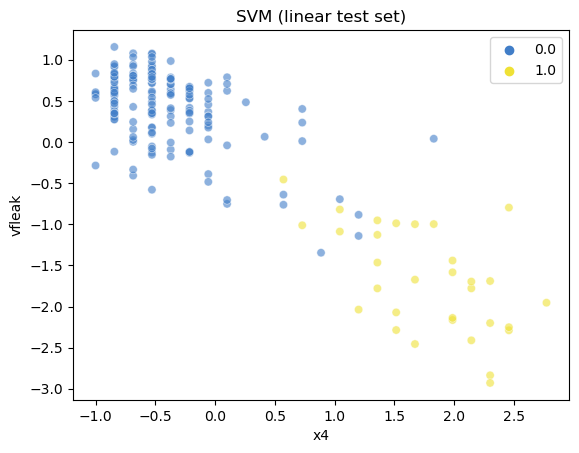

In [37]:
X_set1=X_testscaled[:,dfonu.columns.get_loc(selected_features[0])]
X_set2=X_testscaled[:,dfonu.columns.get_loc(selected_features[1])]
X_set=np.column_stack((X_set1,X_set2,y_pred))

sns.scatterplot(data=X_set,x=X_set[:,0],y=X_set[:,1], hue=X_set[:,2], palette=['#417EC8','#EFE135'], alpha=0.6)

plt.title('SVM (linear test set)')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

plt.show()

It is not possible to run a __contourf__ type graph because we have a trained model with 30 variables, and therefore it expects to predict values for the same 30 variables, so we cannot predict the values of a 2D meshgrid.

Despite the above, we see a classification pattern very similar to the one reproduced in the descriptive phase with the train dataset.

## 5. Improve prediction

__Alternative model 1: C=0.18, kernel=rbf classweight='balanced', gamma=0.1, probability=True__

As this is a model with an exponential function, the fit should be more precise.

In [38]:
svm_rbf= svm.SVC(C=0.18,kernel = 'rbf', gamma=0.1, class_weight='balanced', probability=True, random_state = seed)
svm_rbf.fit(X_trainscaled, y_trainf)

SVC(C=0.18, class_weight='balanced', gamma=0.1, probability=True,
    random_state=751986)

In [56]:
y_pred = svm_rbf.predict(X_testscaled)

print("Model prediction:", accuracy_score(y_test, y_pred, normalize=True))

Model prediction: 0.99


In [57]:
y_pred_2 = svm_rbf.predict(X_trainscaled)

print("Model prediction:", accuracy_score(y_train, y_pred_2, normalize=True))

Model prediction: 0.9922370435162913


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       170
           1       0.94      1.00      0.97        30

    accuracy                           0.99       200
   macro avg       0.97      0.99      0.98       200
weighted avg       0.99      0.99      0.99       200



In [42]:
eval_predict(svm_rbf, sc)

0.5882%


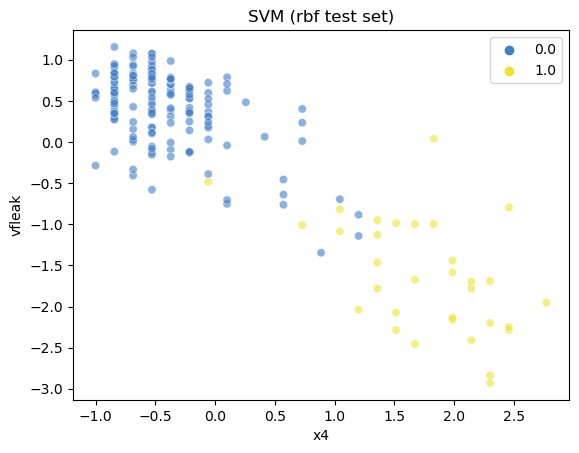

In [43]:
X_set1=X_testscaled[:,dfonu.columns.get_loc(selected_features[0])]
X_set2=X_testscaled[:,dfonu.columns.get_loc(selected_features[1])]
X_set=np.column_stack((X_set1,X_set2,y_pred))

sns.scatterplot(data=X_set,x=X_set[:,0],y=X_set[:,1], hue=X_set[:,2], palette=['#417EC8','#EFE135'], alpha=0.6)

plt.title('SVM (rbf test set)')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

plt.show()

__Alternative model 2: C=0.18, classweight='balanced', degree=4, gamma=0.1, kernel='poly',
    probability=True__

In [44]:
svm_pol = svm.SVC(C=0.18,kernel = 'poly', degree=4, gamma=0.1, class_weight='balanced', probability=True, random_state = seed)
svm_pol.fit(X_trainscaled, y_trainf)

SVC(C=0.18, class_weight='balanced', degree=4, gamma=0.1, kernel='poly',
    probability=True, random_state=751986)

In [45]:
y_pred = svm_pol.predict(X_testscaled)

print("Precisión del modelo:", accuracy_score(y_test, y_pred, normalize=True))

Precisión del modelo: 1.0


In [46]:
y_pred_2 = svm_pol.predict(X_trainscaled)

print("Precisión del modelo:", accuracy_score(y_train, y_pred_2, normalize=True))

Precisión del modelo: 0.9994533129236824


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00        30

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



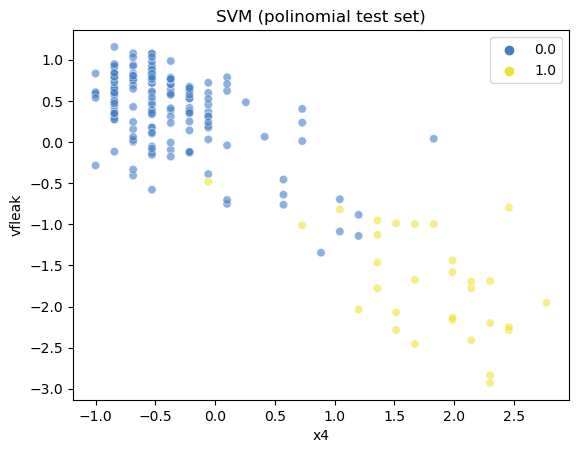

In [48]:
X_set1=X_testscaled[:,dfonu.columns.get_loc(selected_features[0])]
X_set2=X_testscaled[:,dfonu.columns.get_loc(selected_features[1])]
X_set=np.column_stack((X_set1,X_set2,y_pred))

sns.scatterplot(data=X_set,x=X_set[:,0],y=X_set[:,1], hue=X_set[:,2], palette=['#417EC8','#EFE135'], alpha=0.6)

plt.title('SVM (polinomial test set)')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

plt.show()

We see that the goodness of fit of the alternative model 2 presents a full fit to the test dataset and a near full fit to the training dataset. We validate the latter model for the production phase.